In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime
import random 


%matplotlib inline
import matplotlib.pyplot as plt

# importing sqlite
from sqlalchemy import create_engine
from sqlite3 import connect

In [2]:
# import threading to get data faster by assigning every file request to a thread
import threading 

threads = []
dfs =[]


def get_file(file_url):
        dfs.append(pd.read_csv(file_url))
        print(file_url)
        
# creat a thread for every file to get it faster
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    for week_num in week_nums:
        file_url = url.format(week_num)
        x = threading.Thread(target=get_file, args=(file_url,))
        threads.append(x)
        x.start()
        
    # wait for threads to finish
    for thread in threads:
        thread.join()
    return pd.concat(dfs)
week_nums = [210403,210410,210417,210424,210501,210508,210515,210522,210529,
            210605,210612,210619,210626]
turnstiles_df = get_data(week_nums)
turnstiles_df.to_csv("data.csv",index=False)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_210612.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210515.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210605.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210619.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210424.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210508.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210417.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210522.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210410.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210403.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210529.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210501.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210626.txt


In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,12:00:00,REGULAR,7582009,2591655
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,16:00:00,REGULAR,7582124,2591683


In [4]:
# create sqlite engine
engine = create_engine("sqlite:///mtaproject.db")

In [5]:
# connecting to sqlite database and save Dataframe to three_m2021 table
conn =connect(":memory:")
turnstiles_df.to_sql('three_m2021',conn)
turnstiles_df=pd.read_sql('SELECT * FROM three_m2021',conn)
turnstiles_df

C:\anacondaaaaa\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,12:00:00,REGULAR,7582009,2591655
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,16:00:00,REGULAR,7582124,2591683
...,...,...,...,...,...,...,...,...,...,...,...,...
2720544,209406,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,05:00:00,REGULAR,5554,584
2720545,209407,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,09:00:00,REGULAR,5554,584
2720546,209408,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,13:00:00,REGULAR,5554,584
2720547,209409,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,17:00:00,REGULAR,5554,584


In [6]:
#change to timeSerises and make it in one col called [DATE_TIME]
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE+" "+turnstiles_df.TIME,
                                                  format="%m/%d/%Y %H:%M:%S")

In [7]:
turnstiles_df.shape

(2720549, 13)

In [8]:
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATE_TIME'],
      dtype='object')

In [9]:
#remove spaces from columns names.
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [10]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(30)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
230872,B024,R211,00-05-00,KINGS HWY,2021-05-01 12:00:00,2
230895,B024,R211,00-05-00,KINGS HWY,2021-05-05 08:00:00,2
737661,N071,R013,00-00-02,34 ST-PENN STA,2021-04-08 08:00:00,2
230897,B024,R211,00-05-00,KINGS HWY,2021-05-05 16:00:00,2
230898,B024,R211,00-05-00,KINGS HWY,2021-05-05 20:00:00,2
230899,B024,R211,00-05-00,KINGS HWY,2021-05-06 00:00:00,2
230901,B024,R211,00-05-00,KINGS HWY,2021-05-06 08:00:00,2
230902,B024,R211,00-05-00,KINGS HWY,2021-05-06 12:00:00,2
230903,B024,R211,00-05-00,KINGS HWY,2021-05-06 16:00:00,2
230904,B024,R211,00-05-00,KINGS HWY,2021-05-06 20:00:00,2


In [11]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [12]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-03-27 00:00:00,1
1813655,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 10:00:00,1
1813657,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 18:00:00,1
1813658,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 22:00:00,1
1813659,R138,R293,00-05-00,34 ST-PENN STA,2021-05-02 02:00:00,1


In [13]:
turnstiles_df.shape

(2720494, 13)

In [14]:
turnstiles_df.isna().sum()

index        0
C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

In [15]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.max())

In [16]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/27/2021,7550517
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051
...,...,...,...,...,...,...
454318,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/21/2021,5554
454319,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/22/2021,5554
454320,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/23/2021,5554
454321,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/24/2021,5554


In [17]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-17-3a945374269e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [18]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,03/27/2021,7550517,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675,03/27/2021,7550517.0
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,03/28/2021,7550675.0
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,03/29/2021,7551178.0
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,03/30/2021,7551731.0


In [19]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675,03/27/2021,7550517.0
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,03/28/2021,7550675.0
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,03/29/2021,7551178.0
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,03/30/2021,7551731.0
5,A002,R051,02-00-00,59 ST,04/01/2021,7552051,03/31/2021,7552051.0


In [20]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,03/28/2021,885615193,03/27/2021,885615299.0
3551,A011,R080,01-03-00,57 ST-7 AV,03/29/2021,885615100,03/28/2021,885615193.0
3552,A011,R080,01-03-00,57 ST-7 AV,03/30/2021,885614952,03/29/2021,885615100.0
3553,A011,R080,01-03-00,57 ST-7 AV,03/31/2021,885614726,03/30/2021,885614952.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/01/2021,885614501,03/31/2021,885614726.0


In [21]:
turnstiles_daily['STATION'].value_counts()

34 ST-PENN STA     9169
FULTON ST          8639
GRD CNTRL-42 ST    7963
23 ST              6569
86 ST              5845
                   ... 
CORTELYOU RD        270
HARLEM 148 ST       269
SUTTER AV           180
CLEVELAND ST        180
ORCHARD BEACH       171
Name: STATION, Length: 379, dtype: int64

In [22]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

3109 1390173.0
205 4341004.0
2403 18398491.0
14 1028362.0
18182709 5119680.0
5120968 18182709.0
9728986 1159430.0
1160101 9728986.0
1400021 46231.0
46231 1400021.0
25 1400020.0
327866 756269765.0
262152 553649999.0
262152 229572623.0
0 5309746.0
101 2651127.0
104 17275602.0
393980 7714339.0
2147432317 8421808.0
262144 33554713.0
164 2627869.0
232 4735529.0
8972001 22242.0
22568 8972001.0
8986986 29083.0
29438 8986986.0
11289423 1871491.0
1872506 11289423.0
11310395 1893566.0
1894639 11310395.0
778 8883051.0
583 4454753.0
717 7643369.0
240 4780276.0
1534984195 0.0
4 1534984197.0
67109632 1.0
12517611 82.0
23157717 1627480864.0
687970551 19471253.0
1076 7489966.0
463 6101664.0
419 1657978.0
327 2524852.0
262201 2393416.0
67436550 375578.0
143 4070964.0
307 58304819.0
344 2043191.0
528 2341721.0
36880392 33030307.0
4 36880392.0
1418346 304222.0
304627 1418346.0
8847362 2.0
2 8847362.0
213 5198965.0
262145 67109781.0
269 2320052.0
393952 104111192.0
1940 315605669.0
852524 2830560.0
67926 

In [23]:
turnstiles_daily.size

4043592

In [24]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675,03/27/2021,7550517.0,158.0
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,03/28/2021,7550675.0,503.0
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,03/29/2021,7551178.0,553.0
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,03/30/2021,7551731.0,320.0
5,A002,R051,02-00-00,59 ST,04/01/2021,7552051,03/31/2021,7552051.0,0.0


In [25]:
station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])['DAILY_ENTRIES'].sum().reset_index()
station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,03/28/2021,2078.0
1,A002,R051,59 ST,03/29/2021,4244.0
2,A002,R051,59 ST,03/30/2021,4808.0
3,A002,R051,59 ST,03/31/2021,4589.0
4,A002,R051,59 ST,04/01/2021,4495.0


In [26]:
#grouping data by stations and data to find a sum of daily entries
station_daily = \
(turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum()
                 .reset_index())
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,03/28/2021,3750.0
1,1 AV,03/29/2021,267785.0
2,1 AV,03/30/2021,371696.0
3,1 AV,03/31/2021,6544.0
4,1 AV,04/01/2021,6365.0


In [27]:
station_totals= station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,3842119.0
1,86 ST,3817624.0
2,34 ST-HERALD SQ,3504823.0
3,PATH NEW WTC,3127745.0
4,23 ST,2970626.0
5,PAVONIA/NEWPORT,2950012.0
6,28 ST,2880710.0
7,125 ST,2719525.0
8,FULTON ST,2563840.0
9,TIMES SQ-42 ST,2504045.0


In [28]:
top10_crowded_stations= (station_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_crowded_stations

61      34 ST-PENN STA
110              86 ST
59     34 ST-HERALD SQ
315       PATH NEW WTC
46               23 ST
317    PAVONIA/NEWPORT
52               28 ST
9               125 ST
226          FULTON ST
353     TIMES SQ-42 ST
Name: STATION, dtype: object

In [29]:
stations_daily_top10 = \
    station_daily[station_daily['STATION'].isin(top10_crowded_stations)]

In [30]:
stations_daily_top10

,STATION,DATE,DAILY_ENTRIES
810,125 ST,03/28/2021,13208.0
811,125 ST,03/29/2021,24241.0
812,125 ST,03/30/2021,26411.0
813,125 ST,03/31/2021,25751.0
814,125 ST,04/01/2021,25869.0
...,...,...,...
31796,TIMES SQ-42 ST,06/21/2021,24922.0
31797,TIMES SQ-42 ST,06/22/2021,26273.0
31798,TIMES SQ-42 ST,06/23/2021,27672.0
31799,TIMES SQ-42 ST,06/24/2021,28105.0


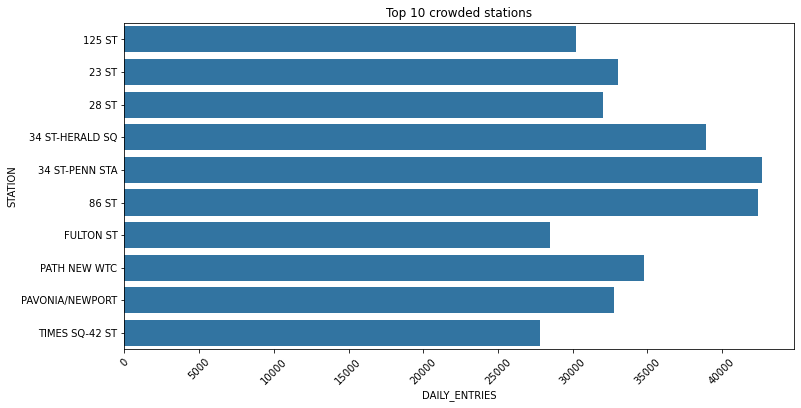

In [32]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(12,6))
sns.barplot(data=stations_daily_top10, x ='DAILY_ENTRIES',y='STATION',ci=0,color=base_color)
plt.xticks(rotation=45)
plt.title('Top 10 crowded stations')
plt.savefig('Top TEN crowded stations.png');

In [33]:
stations_daily_top10= stations_daily_top10[stations_daily_top10['STATION'] == '34 ST-PENN STA']
stations_daily_top10.head()

,STATION,DATE,DAILY_ENTRIES
5490,34 ST-PENN STA,03/28/2021,15851.0
5491,34 ST-PENN STA,03/29/2021,33052.0
5492,34 ST-PENN STA,03/30/2021,36271.0
5493,34 ST-PENN STA,03/31/2021,35230.0
5494,34 ST-PENN STA,04/01/2021,34811.0


In [34]:
stations_daily_top10['WEEK'] = pd.to_datetime(stations_daily_top10['DATE']).dt.week
stations_daily_top10.head()

<ipython-input-34-6d53ce66e157>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  stations_daily_top10['WEEK'] = pd.to_datetime(stations_daily_top10['DATE']).dt.week
<ipython-input-34-6d53ce66e157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_daily_top10['WEEK'] = pd.to_datetime(stations_daily_top10['DATE']).dt.week


,STATION,DATE,DAILY_ENTRIES,WEEK
5490,34 ST-PENN STA,03/28/2021,15851.0,12
5491,34 ST-PENN STA,03/29/2021,33052.0,13
5492,34 ST-PENN STA,03/30/2021,36271.0,13
5493,34 ST-PENN STA,03/31/2021,35230.0,13
5494,34 ST-PENN STA,04/01/2021,34811.0,13


In [35]:
stations_daily_top10['DAY_OF_WEEK_NUM'] = pd.to_datetime(stations_daily_top10['DATE']).dt.dayofweek
stations_daily_top10['WEEK_OF_YEAR'] = pd.to_datetime(stations_daily_top10['DATE']).dt.week
stations_daily_top10.head()

<ipython-input-35-7cf45f179308>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_daily_top10['DAY_OF_WEEK_NUM'] = pd.to_datetime(stations_daily_top10['DATE']).dt.dayofweek
<ipython-input-35-7cf45f179308>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  stations_daily_top10['WEEK_OF_YEAR'] = pd.to_datetime(stations_daily_top10['DATE']).dt.week
<ipython-input-35-7cf45f179308>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,STATION,DATE,DAILY_ENTRIES,WEEK,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
5490,34 ST-PENN STA,03/28/2021,15851.0,12,6,12
5491,34 ST-PENN STA,03/29/2021,33052.0,13,0,13
5492,34 ST-PENN STA,03/30/2021,36271.0,13,1,13
5493,34 ST-PENN STA,03/31/2021,35230.0,13,2,13
5494,34 ST-PENN STA,04/01/2021,34811.0,13,3,13


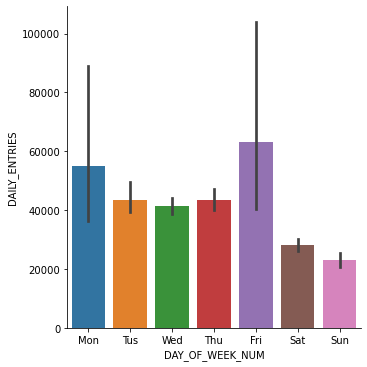

In [36]:
top1 = stations_daily_top10[stations_daily_top10.STATION == '34 ST-PENN STA']
sns.catplot(x="DAY_OF_WEEK_NUM", y='DAILY_ENTRIES', kind="bar",  data=top1)
plt.xticks([0,1,2,3,4,5,6],['Mon','Tus','Wed','Thu','Fri', 'Sat', 'Sun']);